In [3]:
# package
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import seasonal_plot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import pyplot

from numpy import sqrt
from datetime import datetime, timedelta,date
from sklearn.metrics import mean_squared_error
#importing machine learning libraries
import pickle
import gc # to free some space from the memory
from sklearn.model_selection import KFold

import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings("ignore")

#importing regressors
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from xgboost import plot_importance
from lightgbm import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
import re

from sklearn.feature_selection import SelectFromModel

In [4]:
df1 = pd.read_csv(r"\\setrust.local\SetrustDocs\UserDocsV\Vinu.Vanathayan\Desktop\OneDrive_2023-07-20 (1)\Vinu HSC working file\working data\WinterPressuresSource.csv")

# removing 1st row(blank row) and droping the missing DOI from the data set found 61 missing.
df1 = df1.drop(index=0)
df1 = df1.dropna(subset=["Date of Incident"])

In [5]:
df = df1.copy()
df = df.fillna('') # Replace NaN with blank

In [6]:
import re
import pandas as pd

def detect_date_format(date_str):
    formats = [
        r'\d{2}/\d{2}/\d{4}',  # dd/mm/yyyy
        r'\d{4}/\d{2}/\d{2}',  # yyyy/mm/dd
        r'\d{4}-\d{2}-\d{2}',  # yyyy-mm-dd
        r'\d{2}-\d{2}-\d{4}'   # dd-mm-yyyy
    ]
    for format_str in formats:
        if re.match(format_str, date_str):
            return format_str
    return None

def convert_date_format(date_str):
    detected_format = detect_date_format(date_str)
    if detected_format:
        if '/' in detected_format:
            parts = date_str.split('/')
        else:
            parts = date_str.split('-')
        if len(parts[0]) == 4:  # yyyy/mm/dd format
            return f"{parts[2]}/{parts[1]}/{parts[0]}"
        else:  # dd/mm/yyyy or yyyy-mm-dd format
            return date_str
    else:
        return None

# Apply conversion to the "Arrival Date" column
df["Date of Incident"] = df["Date of Incident"].apply(convert_date_format)
df["Arrival Date"] = df["Arrival Date"].apply(convert_date_format)
df["Ambulance Arrival Date"] = df["Ambulance Arrival Date"].apply(convert_date_format)
df["Ambulance Handover Date"] = df["Ambulance Handover Date"].apply(convert_date_format)
df["Triage Date"] = df["Triage Date"].apply(convert_date_format)
df["First Clinician Date"] = df["First Clinician Date"].apply(convert_date_format)
df["Decision to Admit Date"] = df["Decision to Admit Date"].apply(convert_date_format)
df["Date to Ward"] = df["Date to Ward"].apply(convert_date_format)
df["Left Dept Date"] = df["Left Dept Date"].apply(convert_date_format)

In [9]:
df["Date of Incident"] = pd.to_datetime(df["Date of Incident"])
df["Date of Incident"] = pd.to_datetime(df["Date of Incident"], format="%Y-%d-%m %H:%M:%S")
# Assuming 'df' is your DataFrame
df['Time of Incident'] = pd.to_datetime(df['Time of Incident'], errors='coerce').dt.time

# Assuming 'df' is your DataFrame
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])
df['Time of Incident'] = pd.to_timedelta(df['Time of Incident'].astype(str))

# Combine 'Date of Incident' and 'Time of Incident' into a new column 'incident_date_time'
df['incident_date_time'] = df['Date of Incident'] + df['Time of Incident']

# Drop the 'Time of Incident' column
df.drop('Time of Incident', axis=1, inplace=True)

In [10]:
# Assuming 'df' is your DataFrame
df['Ambulance Arrival Date'] = pd.to_datetime(df['Ambulance Arrival Date'])
df['Ambulance Arrival Time'] = pd.to_datetime(df['Ambulance Arrival Time'], errors='coerce').dt.time

# Combine 'Ambulance Arrival Date' and 'Ambulance Arrival Time' into a new column 'Ambulance Arrival Date Time'
df['Ambulance_Arrival_Date_Time'] = df['Ambulance Arrival Date'] + pd.to_timedelta(df['Ambulance Arrival Time'].astype(str))

# Drop the 'Ambulance Arrival Date' and 'Ambulance Arrival Time' columns if needed
df.drop(['Ambulance Arrival Time'], axis=1, inplace=True)

In [11]:
# Assuming 'df' is your DataFrame
df['Ambulance Handover Date'] = pd.to_datetime(df['Ambulance Handover Date'])
df['Ambulance Handover Time'] = pd.to_datetime(df['Ambulance Handover Time'], errors='coerce').dt.time

# Combine 'Ambulance Arrival Date' and 'Ambulance Arrival Time' into a new column 'Ambulance Arrival Date Time'
df['Ambulance_Handover_Date_Time'] = df['Ambulance Handover Date'] + pd.to_timedelta(df['Ambulance Handover Time'].astype(str))

# Drop the 'Ambulance Arrival Date' and 'Ambulance Arrival Time' columns if needed
df.drop(['Ambulance Handover Time'], axis=1, inplace=True)

In [7]:
# Assuming 'df' is your DataFrame
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'],format="%d/%m/%Y")
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce').dt.time

# Combine 'Arrival Date' and 'Arrival Time' into a new column 'Arrival Date Time'
df['Arrival_Date_Time'] = df['Arrival Date'] + pd.to_timedelta(df['Arrival Time'].astype(str))

# Drop the 'Arrival Date' column if needed
df.drop('Arrival Time', axis=1, inplace=True)

In [13]:
df['Triage Date'] = pd.to_datetime(df['Triage Date'])

df['Triage Time'] = pd.to_datetime(df['Triage Time'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['Triage_Date_Time'] = df['Triage Date'] + pd.to_timedelta(df['Triage Time'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('Triage Time', axis=1, inplace=True)

In [14]:
df['First Clinician Date'] = pd.to_datetime(df['First Clinician Date'])
df['First Clinician Date'] = pd.to_datetime(df['First Clinician Date'], format="%Y-%d-%m %H:%M:%S")

df['First Clinician Time'] = pd.to_datetime(df['First Clinician Time'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['First_Clinician_Date_Time'] = df['First Clinician Date'] + pd.to_timedelta(df['First Clinician Time'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('First Clinician Time', axis=1, inplace=True)

In [15]:
df['Decision to Admit Date'] = pd.to_datetime(df['Decision to Admit Date'], errors='coerce')
df['Decision to Admit Time'] = pd.to_datetime(df['Decision to Admit Time'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['Decision_to_Admit_date_Time'] = df['Decision to Admit Date'] + pd.to_timedelta(df['Decision to Admit Time'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('Decision to Admit Time', axis=1, inplace=True)

In [16]:
df['Date to Ward'] = pd.to_datetime(df['Date to Ward'], errors='coerce')
df['Time to Ward'] = pd.to_datetime(df['Time to Ward'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['Date_to_Ward_DATE_Time'] = df['Date to Ward'] + pd.to_timedelta(df['Time to Ward'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('Time to Ward', axis=1, inplace=True)

In [17]:
# Convert 'Left Dept Date' to datetime format, handling incorrect date formats
df['Left Dept Date'] = pd.to_datetime(df['Left Dept Date'], errors='coerce', dayfirst=True)
# Convert 'Left Dept Time' to datetime.time format
df['Left Dept Time'] = pd.to_datetime(df['Left Dept Time'], errors='coerce').dt.time
# Combine 'Left Dept Date' and 'Left Dept Time' into a new column 'Left_Dept_Date_Time'
df['Left_Dept_Date_Time'] = df['Left Dept Date'] + pd.to_timedelta(df['Left Dept Time'].astype(str))

# Drop the 'Left Dept Time' column
df.drop('Left Dept Time', axis=1, inplace=True)

In [8]:
# Define the age ranges and corresponding labels
age_bins = [0, 18, 45, 55, 65, 75, 85, float('inf')]
age_labels = ['<18', '18-44', '45-54', '55-64', '65-74', '75-84', '85+']


# Convert the 'Age' column to numeric, replacing empty strings with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing 'Age' values
df.dropna(subset=['Age'], inplace=True)

# Convert 'Age' into categorical classes
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# 46 missing in Age were dropped
df.dropna(subset="Age_Category",inplace=True)

# # View the updated DataFrame with the 'Age_Category' column
# print(df[['Age', 'Age_Category']])

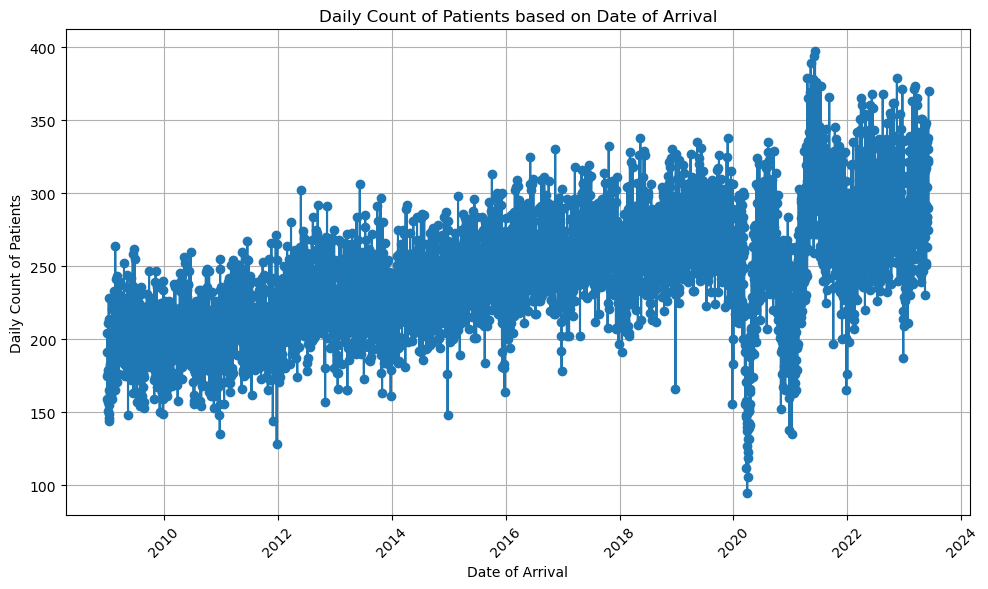

In [8]:
# Group by 'Date of Arrival' and calculate the daily count of patients
daily_patient_count = df.groupby('Arrival Date').size()

# Plot the daily count of patients
plt.figure(figsize=(10, 6))
plt.plot(daily_patient_count.index, daily_patient_count.values, marker='o', linestyle='-')
plt.xlabel('Date of Arrival')
plt.ylabel('Daily Count of Patients')
plt.title('Daily Count of Patients based on Date of Arrival')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Filter the DataFrame to keep only winter months (October to March)
df_winter = df[df["Arrival Date"].dt.month.isin([10, 11, 12, 1, 2, 3])]

In [10]:
# Convert 'Arrival Hour' to the timedelta format
df_winter['Arrival Hour'] = pd.to_timedelta(df_winter['Arrival Hour'], unit='h')

# Combine 'Arrival Date' and 'Arrival Hour' into a single datetime column
df_winter['Arrival Datetime'] = pd.to_datetime(df_winter['Arrival Date']) + df_winter['Arrival Hour']

# Convert timedelta values to strings in the format 'HH:MM:SS'
df_winter['Arrival Hour'] = df_winter['Arrival Hour'].astype(str).str.split(' ').str[-1]

df_winter[["Arrival Hour","Arrival Date",'Arrival Datetime']]
# df_winter[["Arrival Hour","Arrival Date",'Arrival Datetime']].info()

,Arrival Hour,Arrival Date,Arrival Datetime
4,12:00:00,2012-11-10,2012-11-10 12:00:00
5,20:00:00,2009-01-16,2009-01-16 20:00:00
7,19:00:00,2009-01-08,2009-01-08 19:00:00
8,21:00:00,2009-01-15,2009-01-15 21:00:00
9,14:00:00,2009-01-05,2009-01-05 14:00:00
...,...,...,...
1278541,18:00:00,2023-03-30,2023-03-30 18:00:00
1278542,17:00:00,2023-03-31,2023-03-31 17:00:00
1278543,18:00:00,2023-03-31,2023-03-31 18:00:00
1278659,20:00:00,2021-02-12,2021-02-12 20:00:00


In [70]:
winter_daily_hourly_count = df_winter.groupby('Arrival Datetime').size()
# Group by 'Arrival Date' and calculate the daily count of patients
winter_daily_hourly_count = df_winter.groupby('Arrival Datetime').size().reset_index(name='Patient Count')

### Daily Arrival Prediction

In [71]:
# Create a new column 'Day of Week' containing the day of the week for each Arrival Datetime
winter_daily_hourly_count["Day_of_Week"] = winter_daily_hourly_count["Arrival Datetime"].dt.day_name()

# Create a new column 'Month' containing the name of the month for each Arrival Datetime
winter_daily_hourly_count["Month"] = winter_daily_hourly_count["Arrival Datetime"].dt.strftime('%B')

# Create a new column 'COVID Status' indicating whether the year is within the COVID-19 pandemic period
winter_daily_hourly_count["COVID_Status"] = winter_daily_hourly_count["Arrival Datetime"].apply(lambda x: 'Yes' if 2019 <= x.year <= 2021 else 'No')

def get_season(arrival_datetime):
    year = arrival_datetime.year
    if arrival_datetime.month >= 10:
        season = f"{year} to {year + 1}"
    else:
        season = f"{year - 1} to {year}"
    return season

# Apply the get_season function to the "Arrival Datetime" column
winter_daily_hourly_count["Season"] = winter_daily_hourly_count["Arrival Datetime"].apply(get_season)

# Create a new column "Is Weekend" indicating whether the date is a weekend
winter_daily_hourly_count["Is Weekend"] = winter_daily_hourly_count["Arrival Datetime"].dt.weekday >= 5

# Create a new column 'Hour of Day' categorizing hours into morning, afternoon, evening, and night
def categorize_hour(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

winter_daily_hourly_count["Hour of Day"] = winter_daily_hourly_count["Arrival Datetime"].dt.hour.apply(categorize_hour)

In [72]:
winter_daily_hourly_count

,Arrival Datetime,Patient Count,Day_of_Week,Month,COVID_Status,Season,Is Weekend,Hour of Day
0,2009-01-01 00:00:00,5,Thursday,January,No,2008 to 2009,False,Night
1,2009-01-01 01:00:00,3,Thursday,January,No,2008 to 2009,False,Night
2,2009-01-01 02:00:00,5,Thursday,January,No,2008 to 2009,False,Night
3,2009-01-01 03:00:00,4,Thursday,January,No,2008 to 2009,False,Night
4,2009-01-01 04:00:00,4,Thursday,January,No,2008 to 2009,False,Night
...,...,...,...,...,...,...,...,...
62177,2023-03-31 19:00:00,13,Friday,March,No,2022 to 2023,False,Evening
62178,2023-03-31 20:00:00,10,Friday,March,No,2022 to 2023,False,Evening
62179,2023-03-31 21:00:00,13,Friday,March,No,2022 to 2023,False,Evening
62180,2023-03-31 22:00:00,10,Friday,March,No,2022 to 2023,False,Evening


In [73]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding for 'Day of Week', 'Month', and 'COVID Status'
# You can also use one-hot encoding if you prefer

# Define custom mappings for day of the week and month
day_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

month_mapping = {
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
}

weekend_mapping = {
    True: 0,
    False: 1
    
}

# Apply the custom mappings to 'Day of Week' and 'Month'
winter_daily_hourly_count['Day_of_Week_Encoded'] = winter_daily_hourly_count['Day_of_Week'].map(day_mapping)
winter_daily_hourly_count['Month_Encoded'] = winter_daily_hourly_count['Month'].map(month_mapping)
winter_daily_hourly_count['Is_Weekend_Encoded'] = winter_daily_hourly_count["Is Weekend"].map(weekend_mapping)

label_encodings = {}

# Encode 'Hour of Day' and store the label encoding
hour_of_day_le = LabelEncoder()
winter_daily_hourly_count['Hour of Day_Encoded'] = hour_of_day_le.fit_transform(winter_daily_hourly_count['Hour of Day'])
label_encodings['Hour of Day'] = hour_of_day_le.classes_

for column in ['COVID_Status']:
    le = LabelEncoder()
    winter_daily_hourly_count[column + '_Encoded'] = le.fit_transform(winter_daily_hourly_count[column])
    label_encodings[column] = le.classes_

# Print the label encodings for reference
for column, classes in label_encodings.items():
    print(column, ":", classes)
    

Hour of Day : ['Afternoon' 'Evening' 'Morning' 'Night']
COVID_Status : ['No' 'Yes']


In [74]:
# winter_daily_patient_count.set_index('Arrival Date', inplace=True)
winter_daily_hourly_count

,Arrival Datetime,Patient Count,Day_of_Week,Month,COVID_Status,Season,Is Weekend,Hour of Day,Day_of_Week_Encoded,Month_Encoded,Is_Weekend_Encoded,Hour of Day_Encoded,COVID_Status_Encoded
0,2009-01-01 00:00:00,5,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0
1,2009-01-01 01:00:00,3,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0
2,2009-01-01 02:00:00,5,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0
3,2009-01-01 03:00:00,4,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0
4,2009-01-01 04:00:00,4,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62177,2023-03-31 19:00:00,13,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0
62178,2023-03-31 20:00:00,10,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0
62179,2023-03-31 21:00:00,13,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0
62180,2023-03-31 22:00:00,10,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0


In [75]:
# Sample data for the "Season" column
seasons = ['2008 to 2009', '2009 to 2010', '2010 to 2011', '2011 to 2012',
           '2012 to 2013', '2013 to 2014', '2014 to 2015', '2015 to 2016',
           '2016 to 2017', '2017 to 2018', '2018 to 2019', '2019 to 2020',
           '2020 to 2021', '2021 to 2022', '2022 to 2023','2023 to 2024']
# Create a mapping of season labels to numerical values
season_to_num = {season: i for i, season in enumerate(seasons)}


# Apply the mapping to the "Season" column and add a new "Season_Num" column
winter_daily_hourly_count["Season_Num"] = winter_daily_hourly_count["Season"].map(season_to_num)

In [76]:
winter_daily_hourly_count

,Arrival Datetime,Patient Count,Day_of_Week,Month,COVID_Status,Season,Is Weekend,Hour of Day,Day_of_Week_Encoded,Month_Encoded,Is_Weekend_Encoded,Hour of Day_Encoded,COVID_Status_Encoded,Season_Num
0,2009-01-01 00:00:00,5,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0,0
1,2009-01-01 01:00:00,3,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0,0
2,2009-01-01 02:00:00,5,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0,0
3,2009-01-01 03:00:00,4,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0,0
4,2009-01-01 04:00:00,4,Thursday,January,No,2008 to 2009,False,Night,4,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62177,2023-03-31 19:00:00,13,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0,14
62178,2023-03-31 20:00:00,10,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0,14
62179,2023-03-31 21:00:00,13,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0,14
62180,2023-03-31 22:00:00,10,Friday,March,No,2022 to 2023,False,Evening,5,2,1,1,0,14


In [77]:
sea_df = winter_daily_hourly_count[["Arrival Datetime","Patient Count","COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]

In [78]:
sea_df.set_index("Arrival Datetime", inplace=True)

ADF Test Results:
ADF Statistic: -17.34506882699907
p-value: 5.31189035393886e-30
Critical Values:
1%: -3.4304552714900782
5%: -2.8615865280366974
10%: -2.5667947653002723


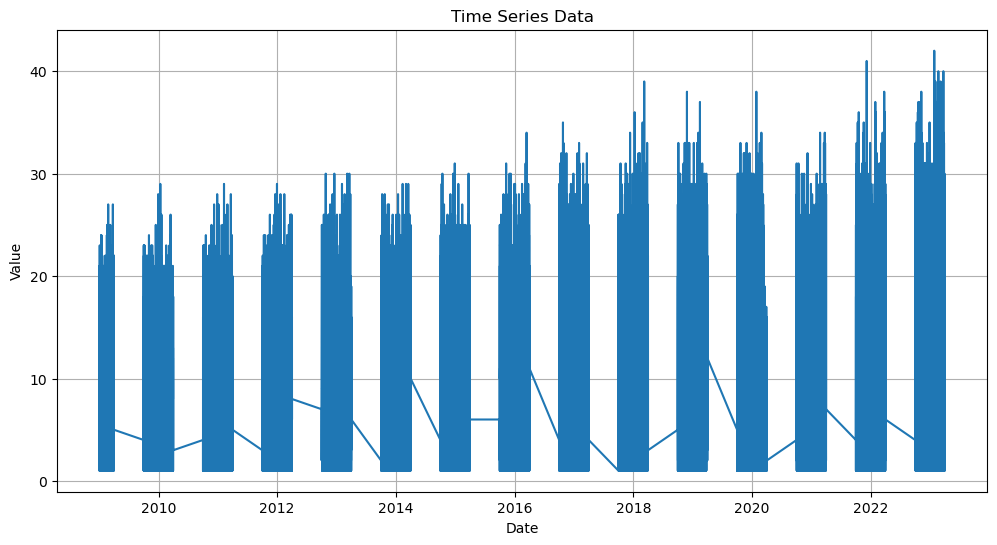

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load your time series data (replace 'your_data.csv' with your file)
# For example, you can load data like this:
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Assuming you have a datetime index, you can extract the time series
# Replace 'your_column_name' with the actual column name you want to test
time_series = sea_df["Patient Count"]

# Function to perform ADF test and print results
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Test Results:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Perform ADF test on the time series
adf_test(time_series)

# Plot the time series to visualize it
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'

train_data = sea_df[train_start:train_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_train = train_data["Patient Count"]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Access feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
5   Hour of Day_Encoded    0.824076
3            Season_Num    0.085568
1         Month_Encoded    0.037038
2   Day_of_Week_Encoded    0.033253
4    Is_Weekend_Encoded    0.017713
0  COVID_Status_Encoded    0.002353


Explained Variance Ratio: [0.27203906 0.16749401]


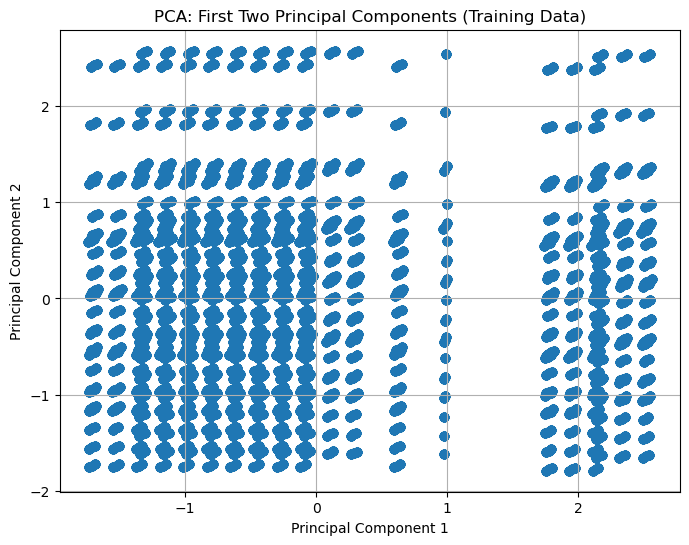

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the feature data (important for PCA)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

# Initialize PCA with the number of components you want to keep (e.g., 2 for visualization)
pca = PCA(n_components=2)

# Fit PCA to the scaled training data
pca.fit(scaled_X_train)

# Transform the training data into the first two principal components
pca_components_train = pca.transform(scaled_X_train)

# Create a DataFrame with the principal components
pca_df_train = pd.DataFrame(data=pca_components_train, columns=['PC1', 'PC2'])

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_train['PC1'], pca_df_train['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components (Training Data)')
plt.grid(True)
plt.show()


In [82]:
# Get the loadings of the original variables on the first two principal components
loadings = pca.components_[:2]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=X_train.columns, index=['PC1', 'PC2'])

# Display the loadings
print("Loadings of Original Variables on PC1 and PC2:")
print(loadings_df)

Loadings of Original Variables on PC1 and PC2:
     COVID_Status_Encoded  Month_Encoded  Day_of_Week_Encoded  Season_Num  \
PC1              0.700575       0.103434             0.001686    0.705989   
PC2             -0.014589       0.068301            -0.390946   -0.000085   

     Is_Weekend_Encoded  Hour of Day_Encoded  
PC1            0.002663             0.008147  
PC2           -0.618615             0.677937  


# ARIMA 

Mean Squared Error (MSE): 123.42887894857537
Mean Absolute Error (MAE): 8.4089313906836
Min Forecasting Error: 0.0006682562261453029
Max Forecasting Error: 38.12262850480956
Mean Forecasting Error: 8.4089313906836
Standard Deviation: 7.261783411762957
R-squared (R2): -0.8918701221131844
Correlation: 0.5039958897599608


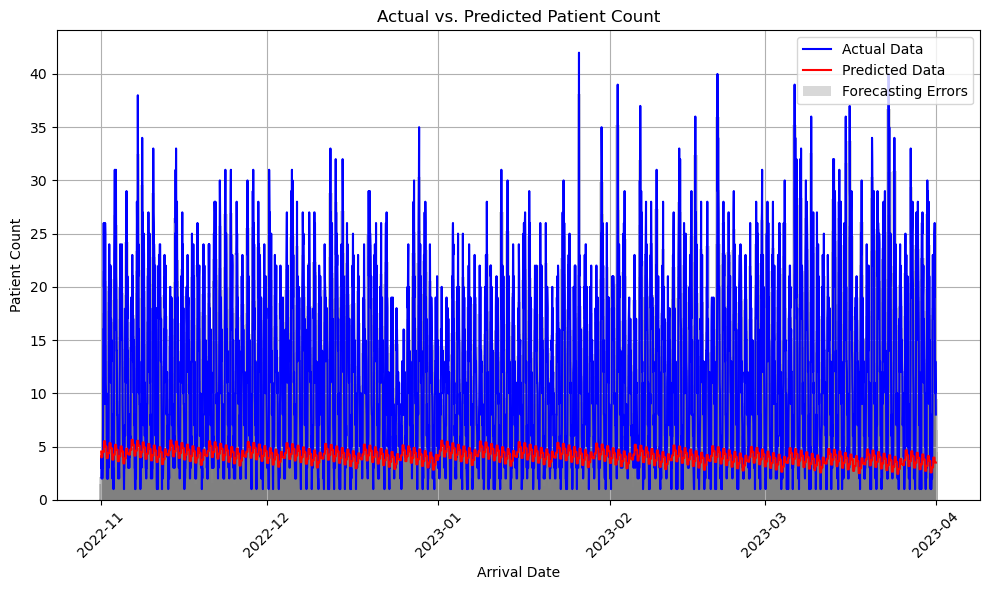

In [83]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_test = test_data['Patient Count']

# Fit an ARIMA model
order = (4, 2, 3)  # Specify the order of the ARIMA model
model = ARIMA(train_data['Patient Count'], order=order, exog=X_train)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=X_test, typ='levels')

predictions_df = pd.DataFrame({'Arrival Date': test_data.index, 'Predicted Patient Count': predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
forecast_error = np.abs(test_data['Patient Count'] - predictions_df['Predicted Patient Count'])
r2 = r2_score(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
correlation = test_data['Patient Count'].corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Patient Count'], label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [84]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "ARIMA",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = pd.DataFrame(model_metrics, index=[0])
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,123.428879,8.408931,0.000668,38.122629,8.408931,7.261783,-0.89187,0.503996


# XG Boost

Mean Squared Error (MSE): 32.58475630342938
Mean Absolute Error (MAE): 4.299021995574303
Min Forecasting Error: 0.0005950927734375
Max Forecasting Error: 29.63030242919922
Mean Forecasting Error: 4.299021995574303
Standard Deviation: 3.7559434402807406
R-squared (R2): 0.5005534570845358
Correlation: 0.7075000304013562


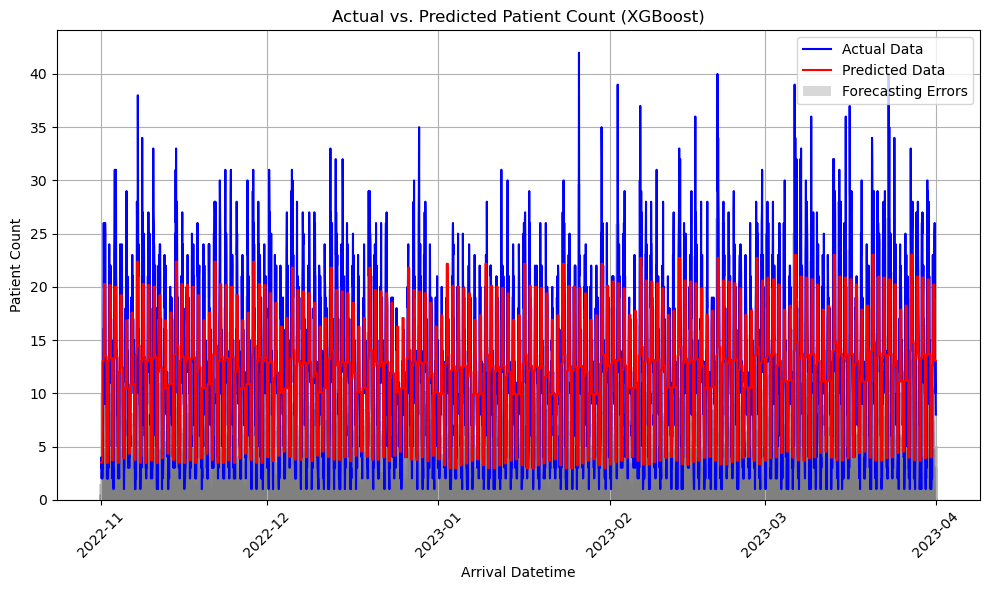

In [85]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_test = test_data['Patient Count']

# Fit an XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions with the Arrival Date as the index
predictions_df = pd.DataFrame({'Predicted Patient Count': predictions}, index=test_data.index)
predictions_df.index.name = "Arrival Datetime"  # Set the index name to match your data

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

# Print the metrics and statistics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Datetime')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (XGBoost)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [86]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "XG boost",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,123.428879,8.408931,0.000668,38.122629,8.408931,7.261783,-0.891870,0.503996
1,XG boost,32.584756,4.299022,0.000595,29.630302,4.299022,3.755943,0.500553,0.707500


# Regression

Mean Squared Error (MSE): 39.33888007195252
Mean Absolute Error (MAE): 4.9306299322578555
Min Forecasting Error: 0.0006948226528464829
Max Forecasting Error: 31.682299711527627
Mean Forecasting Error: 4.9306299322578555
Standard Deviation: 3.877108731348119
R-squared (R2): 0.3970288600244981
Correlation: 0.647239071396214


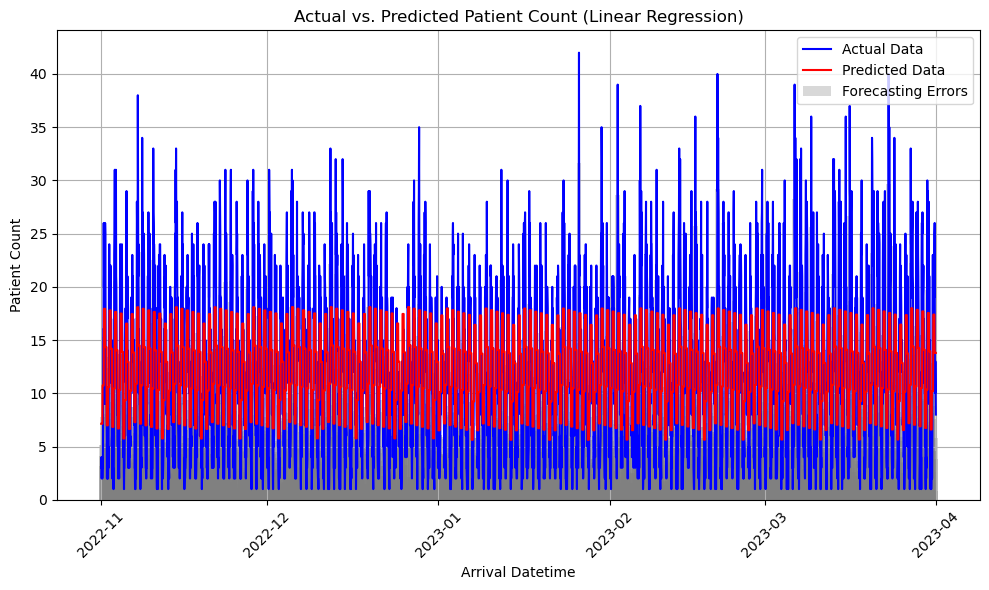

In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_test = test_data['Patient Count']

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions with the Arrival Date as the index
predictions_df = pd.DataFrame({'Predicted Patient Count': predictions}, index=test_data.index)
predictions_df.index.name = "Arrival Datetime"  # Set the index name to match your data

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

# Print the metrics and statistics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Datetime')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (Linear Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [88]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "Simple LR",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,123.428879,8.408931,0.000668,38.122629,8.408931,7.261783,-0.891870,0.503996
1,XG boost,32.584756,4.299022,0.000595,29.630302,4.299022,3.755943,0.500553,0.707500
2,Simple LR,39.338880,4.930630,0.000695,31.682300,4.930630,3.877109,0.397029,0.647239


# Random Forest

Mean Squared Error (MSE): 37.45830790577606
Mean Absolute Error (MAE): 4.507296933694172
Min Forecasting Error: 0.036716501916099986
Max Forecasting Error: 31.0367165019161
Mean Forecasting Error: 4.507296933694172
Standard Deviation: 4.140939191196973
R-squared (R2): 0.4258535429023942
Correlation: 0.6845868847638622


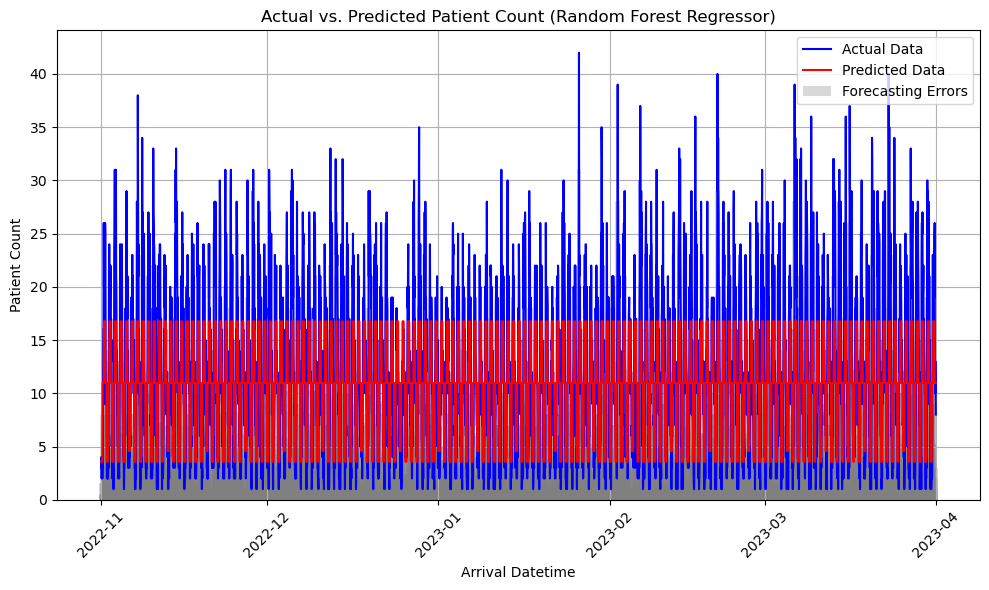

In [89]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Hour of Day_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Hour of Day_Encoded"]]
y_test = test_data['Patient Count']

# Fit a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions with the Arrival Date as the index
predictions_df = pd.DataFrame({'Predicted Patient Count': predictions}, index=test_data.index)
predictions_df.index.name = "Arrival Datetime"  # Set the index name to match your data

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

# Print the metrics and statistics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Datetime')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [90]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "Random Forest",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,123.428879,8.408931,0.000668,38.122629,8.408931,7.261783,-0.891870,0.503996
1,XG boost,32.584756,4.299022,0.000595,29.630302,4.299022,3.755943,0.500553,0.707500
2,Simple LR,39.338880,4.930630,0.000695,31.682300,4.930630,3.877109,0.397029,0.647239
3,Simple LR,37.458308,4.507297,0.036717,31.036717,4.507297,4.140939,0.425854,0.684587


# LSTM

Epoch 1/100
1832/1832 - 11s - loss: 34.6921 - 11s/epoch - 6ms/step
Epoch 2/100
1832/1832 - 9s - loss: 26.3957 - 9s/epoch - 5ms/step
Epoch 3/100
1832/1832 - 9s - loss: 25.7461 - 9s/epoch - 5ms/step
Epoch 4/100
1832/1832 - 9s - loss: 25.3492 - 9s/epoch - 5ms/step
Epoch 5/100
1832/1832 - 10s - loss: 25.0614 - 10s/epoch - 6ms/step
Epoch 6/100
1832/1832 - 11s - loss: 24.7897 - 11s/epoch - 6ms/step
Epoch 7/100
1832/1832 - 12s - loss: 24.5824 - 12s/epoch - 6ms/step
Epoch 8/100
1832/1832 - 13s - loss: 24.3510 - 13s/epoch - 7ms/step
Epoch 9/100
1832/1832 - 12s - loss: 24.2865 - 12s/epoch - 6ms/step
Epoch 10/100
1832/1832 - 10s - loss: 24.0845 - 10s/epoch - 6ms/step
Epoch 11/100
1832/1832 - 9s - loss: 23.9662 - 9s/epoch - 5ms/step
Epoch 12/100
1832/1832 - 10s - loss: 23.8533 - 10s/epoch - 5ms/step
Epoch 13/100
1832/1832 - 10s - loss: 23.8998 - 10s/epoch - 5ms/step
Epoch 14/100
1832/1832 - 10s - loss: 23.8244 - 10s/epoch - 5ms/step
Epoch 15/100
1832/1832 - 10s - loss: 23.7988 - 10s/epoch - 6ms/st

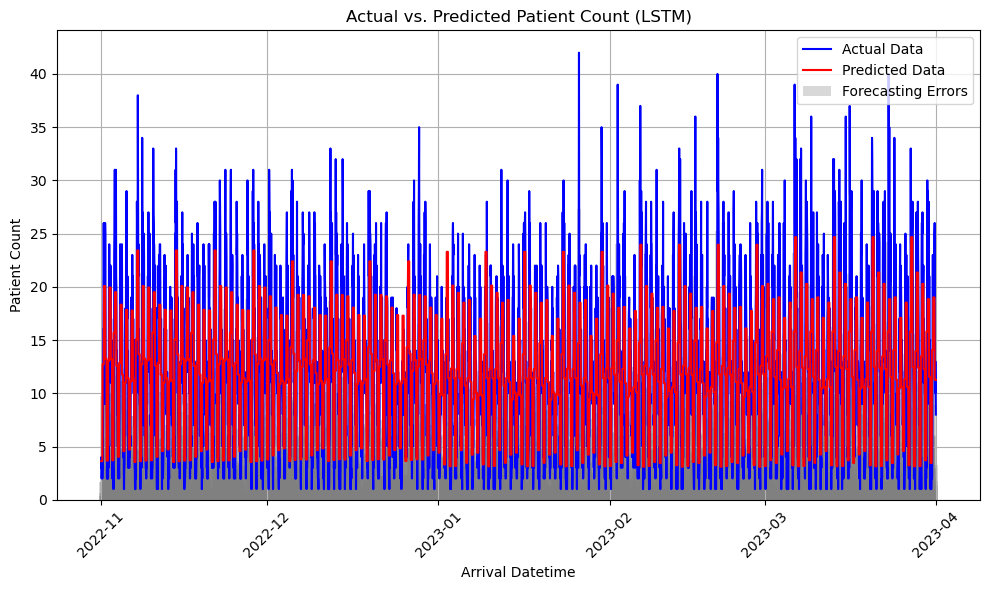

In [95]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Dropout

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_test = test_data['Patient Count']

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the LSTM model with dropout layers
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))  # Add a dropout layer with a dropout rate of 0.2
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))  # Add another dropout layer with a dropout rate of 0.2
model.add(Dense(1))

# Define the optimizer with a specific learning rate (e.g., 0.001)
optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Reshape data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Make predictions
predictions = model.predict(X_test)

# Reshape predictions to be 1-dimensional
predictions = predictions.flatten()

# Create a DataFrame for predictions with the Arrival Datetime as the index
predictions_df = pd.DataFrame({'Predicted Patient Count': predictions}, index=test_data.index)
predictions_df.index.name = "Arrival Datetime"  # Set the index name to match your data

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

# Print the metrics and statistics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Datetime')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (LSTM)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [92]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "LSTM",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,123.428879,8.408931,0.000668,38.122629,8.408931,7.261783,-0.891870,0.503996
1,XG boost,32.584756,4.299022,0.000595,29.630302,4.299022,3.755943,0.500553,0.707500
2,Simple LR,39.338880,4.930630,0.000695,31.682300,4.930630,3.877109,0.397029,0.647239
3,Simple LR,37.458308,4.507297,0.036717,31.036717,4.507297,4.140939,0.425854,0.684587
4,LSTM,35.338975,4.631741,0.000686,28.413916,4.631741,3.726907,0.458338,0.707300


# Polynomial regression:

Mean Squared Error (MSE): 37.264945462589544
Mean Absolute Error (MAE): 4.5848803125505215
Min Forecasting Error: 0.003673553466796875
Max Forecasting Error: 32.90190887451172
Mean Forecasting Error: 4.5848803125505215
Standard Deviation: 4.0309256638501605
R-squared (R2): 0.42881732765130853
Correlation: 0.6554843071671407


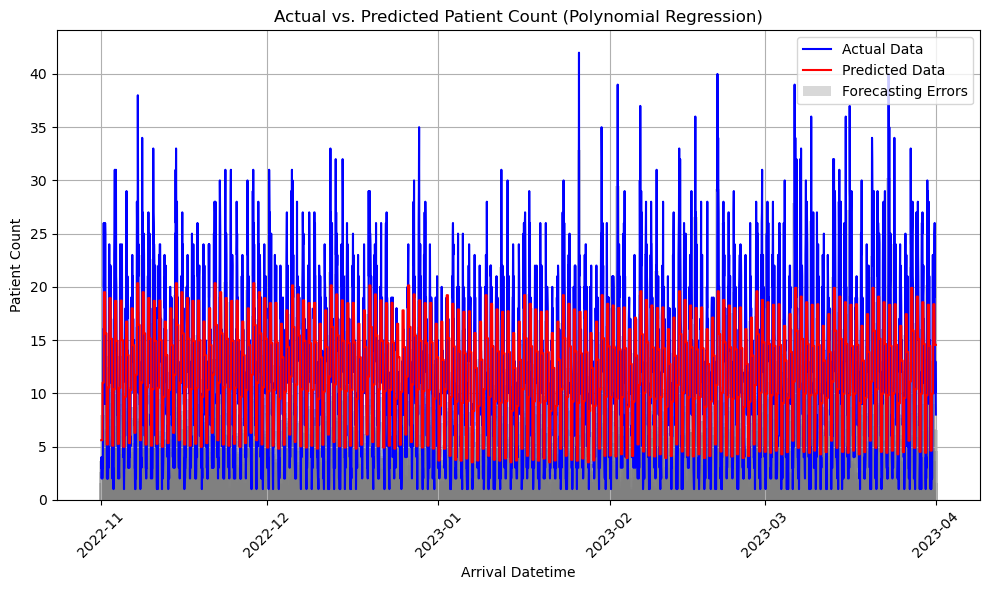

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded","Hour of Day_Encoded"]]
y_test = test_data['Patient Count']

# Standardize the features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
predictions = model.predict(X_test_poly)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
correlation = y_test.corr(pd.Series(predictions, index=y_test.index))

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions)
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

# Print the metrics and statistics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Data', color='red')
plt.bar(y_test.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Datetime')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
